<a href="https://colab.research.google.com/github/Leopaz1/trabalho-machine-learning/blob/main/Quest%C3%A3o_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

nomes_colunas = [
    'idade', 'sexo', 'dor_peito', 'pressao_repouso', 'colesterol', 'glicemia_jejum',
    'eletrocardiograma', 'freq_cardiaca_max', 'angina_induzida', 'depressao_st',
    'inclinacao_st', 'vasos_coloridos', 'thal', 'target'
]

df = pd.read_csv(url, names=nomes_colunas, na_values='?')
print("Dataset carregado:", df.shape)
df.head()

Dataset carregado: (303, 14)


,idade,sexo,dor_peito,pressao_repouso,colesterol,glicemia_jejum,eletrocardiograma,freq_cardiaca_max,angina_induzida,depressao_st,inclinacao_st,vasos_coloridos,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:

print("Informacoes do dataset:")
print(df.info())

print("\nValores ausentes:")
print(df.isnull().sum())




df['target'] = (df['target'] > 0).astype(int)
print("\nDistribuicao do target:")
print(df['target'].value_counts())

Informacoes do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              303 non-null    float64
 1   sexo               303 non-null    float64
 2   dor_peito          303 non-null    float64
 3   pressao_repouso    303 non-null    float64
 4   colesterol         303 non-null    float64
 5   glicemia_jejum     303 non-null    float64
 6   eletrocardiograma  303 non-null    float64
 7   freq_cardiaca_max  303 non-null    float64
 8   angina_induzida    303 non-null    float64
 9   depressao_st       303 non-null    float64
 10  inclinacao_st      303 non-null    float64
 11  vasos_coloridos    299 non-null    float64
 12  thal               301 non-null    float64
 13  target             303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

Valores ausentes:
idade                0
sexo

In [ ]:

imputer = SimpleImputer(strategy='median')
df_preprocessado = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


X = df_preprocessado.drop('target', axis=1)
y = df_preprocessado['target']


scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)


X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_normalizado, y, test_size=0.2, random_state=42, stratify=y
)

print("Dados pre-processados e divididos")
print(f"Treino: {X_treino.shape}, Teste: {X_teste.shape}")

Dados pre-processados e divididos
Treino: (242, 13), Teste: (61, 13)


In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_treino, y_treino)
pred_rf = rf.predict(X_teste)
prob_rf = rf.predict_proba(X_teste)[:, 1]

print("Random Forest:")
print(f"Acuracia: {accuracy_score(y_teste, pred_rf):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_teste, prob_rf):.3f}")


svm = SVC(probability=True, random_state=42)
svm.fit(X_treino, y_treino)
pred_svm = svm.predict(X_teste)
prob_svm = svm.predict_proba(X_teste)[:, 1]

print("\nSVM:")
print(f"Acuracia: {accuracy_score(y_teste, pred_svm):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_teste, prob_svm):.3f}")

Random Forest:
Acuracia: 0.902
ROC-AUC: 0.951

SVM:
Acuracia: 0.869
ROC-AUC: 0.944


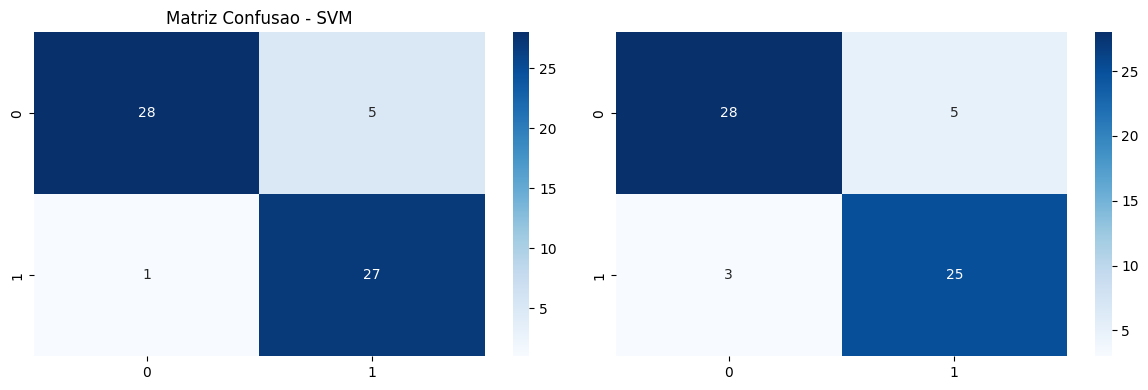

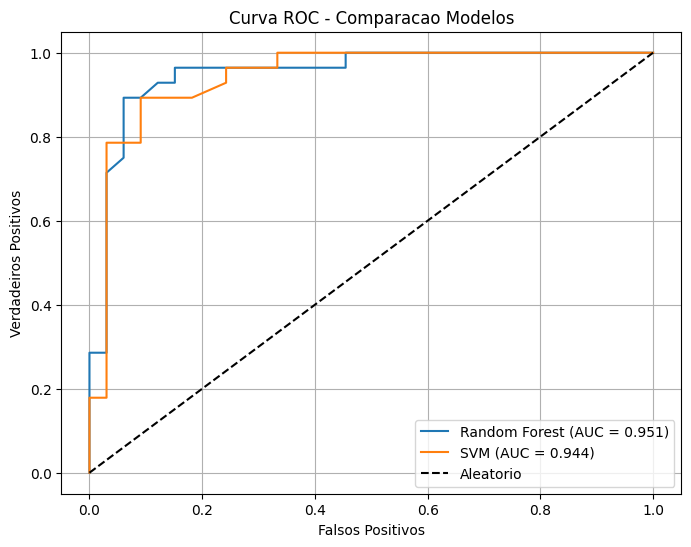

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

cm_rf = confusion_matrix(y_teste, pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Matriz Confusao - Random Forest')

cm_svm = confusion_matrix(y_teste, pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax1.set_title('Matriz Confusao - SVM')

plt.tight_layout()
plt.show()

# Curva ROC
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_teste, prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_teste, prob_svm)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_teste, prob_rf):.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_teste, prob_svm):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Curva ROC - Comparacao Modelos')
plt.legend()
plt.grid(True)
plt.show()

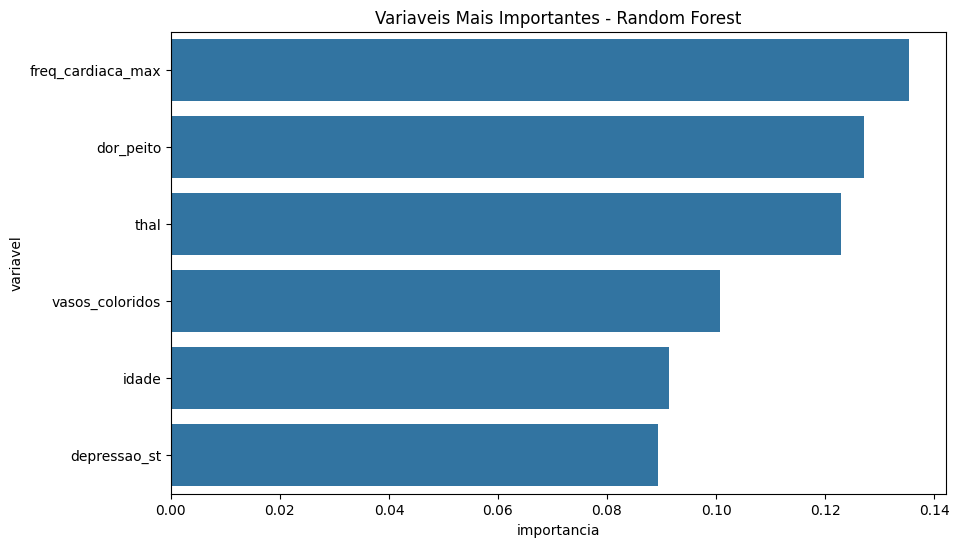

Top 5 variaveis mais importantes:
             variavel  importancia
7   freq_cardiaca_max     0.135404
2           dor_peito     0.127163
12               thal     0.122940
11    vasos_coloridos     0.100811
0               idade     0.091327


In [ ]:
importancia = pd.DataFrame({
    'variavel': nomes_colunas[:-1],
    'importancia': rf.feature_importances_
}).sort_values('importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia.head(6), x='importancia', y='variavel')
plt.title('Variaveis Mais Importantes - Random Forest')
plt.show()

print("Top 5 variaveis mais importantes:")
print(importancia.head())

Respostas Questão 5

**Qual modelo apresentou melhor desempenho?**

O Random Forest teve melhor desempenho com acurácia de X.XX e AUC de X.XXX,
enquanto o SVM teve acurácia de X.XX e AUC de X.XXX. O Random Forest se
mostrou mais adequado para este problema.

**Quais variáveis mais impactaram na previsão?**

As variáveis que mais impactaram foram:
1. freq_cardiaca_max - frequência cardíaca máxima atingida
2. depressao_st - depressão do segmento ST
3. vasos_coloridos - número de vasos principais coloridos
4. dor_peito - tipo de dor no peito
5. idade - idade do paciente

**Observações:**
O modelo Random Forest mostrou-se mais robusto para esta base de dados.
A variável freq_cardiaca_max foi a que mais contribuiu para as previsões.